In [1]:
import pandas as pd

from utils.model_utils import *

In [2]:
data_df = pd.read_csv("data/nearest_places_mapping.csv")
print(data_df.shape)
data_df.head(5)

(4498, 10)


,location_name_1,N_1,E_1,X_1,Y_1,location_name_2,N_2,E_2,X_2,Y_2
0,grab_1216908647.318,4994.928,-3023.441,-2892.030,5058.007,grab_1216904541.487,4993.276,-3019.528,-2888.173,5056.267
1,grab_1216908662.125,4991.210,-3017.480,-2886.182,5054.156,grab_1216908018.296,4988.612,-3018.339,-2887.100,5051.583
2,grab_1216908678.463,4987.743,-3012.651,-2881.456,5050.583,grab_1216908016.595,4986.539,-3014.175,-2883.003,5049.416
3,grab_1216908679.824,4985.295,-3008.686,-2877.566,5048.046,grab_1216904557.318,4984.349,-3008.709,-2877.612,5047.102
4,grab_1216908680.845,4983.482,-3004.505,-2873.445,5046.139,grab_1216904558.844,4982.276,-3004.523,-2873.492,5044.936


In [3]:
data_df = data_df.sample(frac=1).reset_index(drop=True)
data_df = data_df.head(1000)

In [4]:
# load the best model with PCA (trained by SFRS)
model = load_model("OpenIBL")

Using cache found in C:\Users\barte/.cache\torch\hub\yxgeee_OpenIBL_master
c:\Users\barte\anaconda3\envs\pikebot\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\barte\anaconda3\envs\pikebot\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [5]:
embeddings_df = extract_location_embeddings_OpenIBL(data_df, model)
save_embeddings_to_npy(embeddings_df, output_folder='data/saved_embeddings')
embeddings_df.head()

Processing Locations: 100%|██████████| 1885/1885 [05:13<00:00,  6.01it/s]


,location_name,view,embedding
0,grab_1216909288.697,0,"[0.017953351, -0.004034522, 0.013757664, -0.01..."
1,grab_1216909288.697,1,"[0.0162197, -0.0030770698, 0.013919403, -0.007..."
2,grab_1216909288.697,2,"[0.01920464, -0.013237571, 0.010705231, -0.007..."
3,grab_1216909288.697,3,"[0.018769996, -0.004447445, 0.007186958, 0.000..."
4,grab_1216909288.697,4,"[0.0036366503, -0.011423955, 0.015014887, 0.01..."


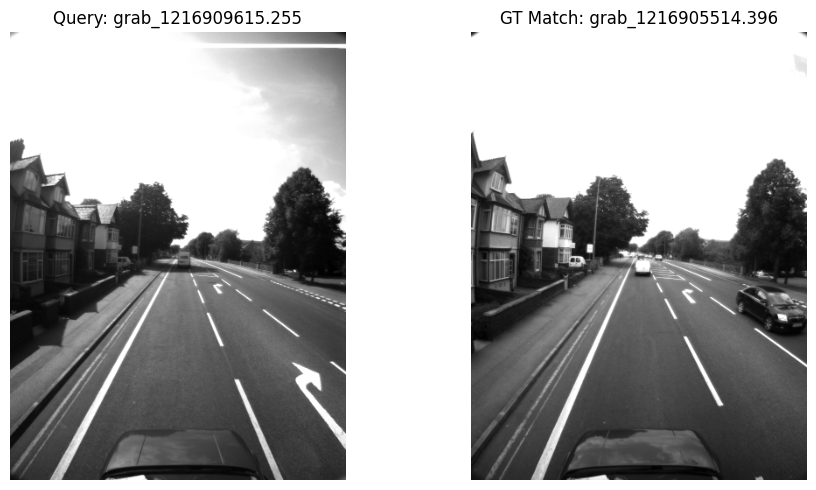

In [33]:
display_gt_pair(data_df, 1, 0)

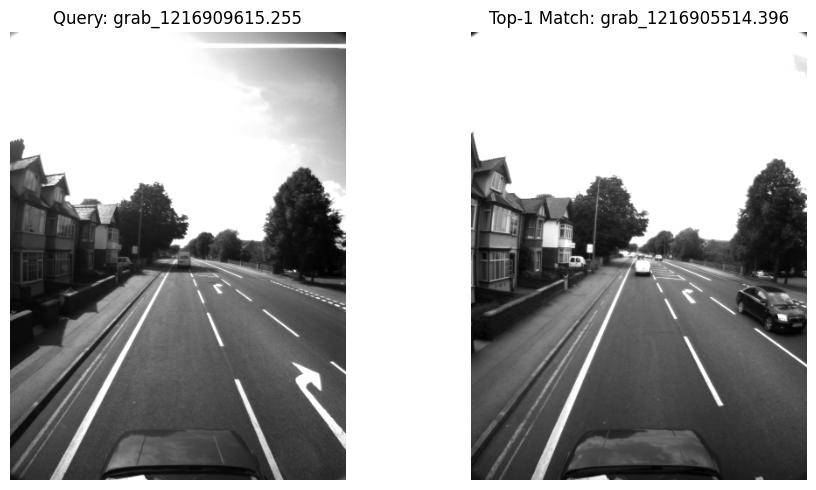

In [34]:
closest = search_closest("grab_1216909615.255", 0, embeddings_df, base_df=data_df, show=True)

In [19]:
results = evaluate_accuracy_per_view(data_df, embeddings_df)

Calculating results for view 0: 1000it [00:15, 66.13it/s]
Calculating results for view 1: 1000it [00:13, 76.32it/s]
Calculating results for view 2: 1000it [00:14, 67.07it/s]
Calculating results for view 3: 1000it [00:14, 68.34it/s]
Calculating results for view 4: 1000it [00:12, 79.42it/s]


In [20]:
results

{0: {'top1_accuracy': 0.633,
  'top5_accuracy': 0.789,
  'top10_accuracy': 0.836,
  'count': 1000},
 1: {'top1_accuracy': 0.633,
  'top5_accuracy': 0.793,
  'top10_accuracy': 0.834,
  'count': 1000},
 2: {'top1_accuracy': 0.631,
  'top5_accuracy': 0.795,
  'top10_accuracy': 0.841,
  'count': 1000},
 3: {'top1_accuracy': 0.598,
  'top5_accuracy': 0.758,
  'top10_accuracy': 0.807,
  'count': 1000},
 4: {'top1_accuracy': 0.59,
  'top5_accuracy': 0.739,
  'top10_accuracy': 0.781,
  'count': 1000}}

In [ ]:
mv_results = evaluate_accuracy_majority_vote(data_df, embeddings_df)

Majority Voting Accuracies:


TypeError: argument of type 'int' is not iterable

In [22]:
mv_results

{'top1_accuracy': 0.787,
 'top5_accuracy': 0.921,
 'top10_accuracy': 0.932,
 'count': 1000}

In [ ]:
embeddings_df_loaded = load_embeddings_from_npy_folder('data/saved_embeddings')

         location_name  view  \
0  grab_1216904045.433     0   
1  grab_1216904045.433     1   
2  grab_1216904045.433     2   
3  grab_1216904045.433     3   
4  grab_1216904045.433     4   

                                           embedding  
0  [0.0017391279, 0.013853696, 0.014467196, -0.01...  
1  [0.009103301, 0.0059983428, 0.015865924, -0.00...  
2  [0.015980557, 0.009520805, 0.01043413, -0.0043...  
3  [0.019895261, 0.008531939, 0.012873506, -0.015...  
4  [0.018438762, 0.0066599892, 0.014896992, -0.01...  


In [25]:
embeddings_df_loaded.head()

,location_name,view,embedding
0,grab_1216904045.433,0,"[0.0017391279, 0.013853696, 0.014467196, -0.01..."
1,grab_1216904045.433,1,"[0.009103301, 0.0059983428, 0.015865924, -0.00..."
2,grab_1216904045.433,2,"[0.015980557, 0.009520805, 0.01043413, -0.0043..."
3,grab_1216904045.433,3,"[0.019895261, 0.008531939, 0.012873506, -0.015..."
4,grab_1216904045.433,4,"[0.018438762, 0.0066599892, 0.014896992, -0.01..."
